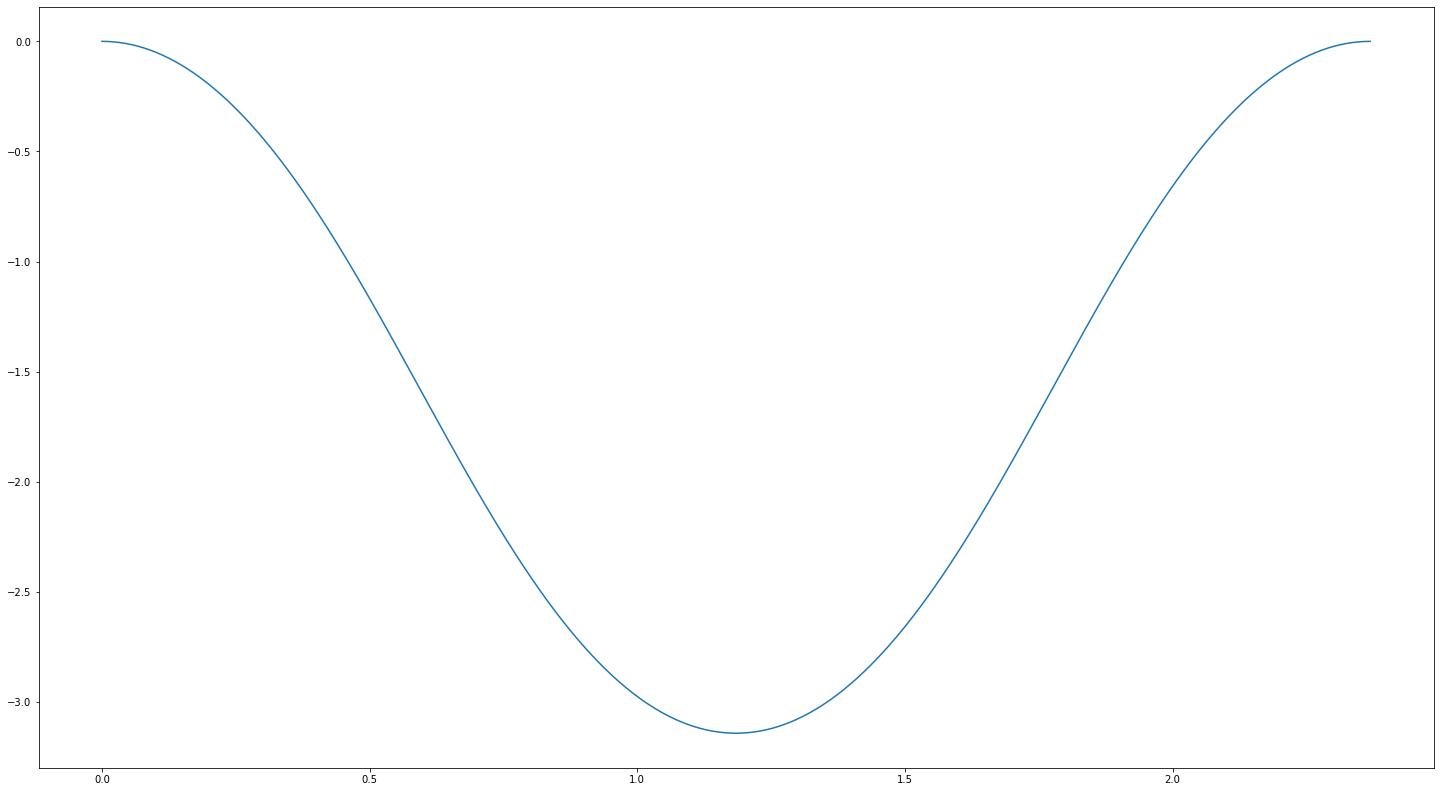

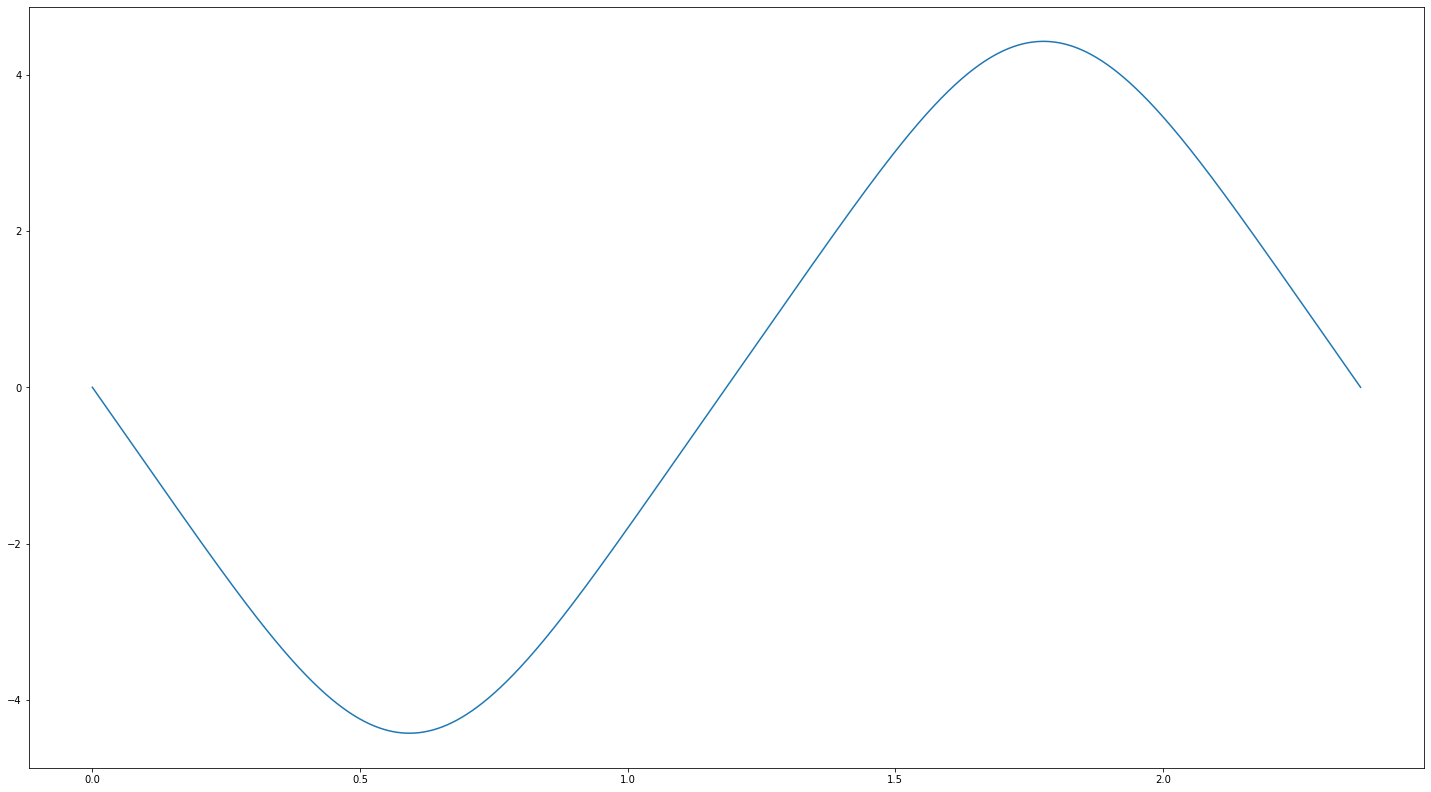

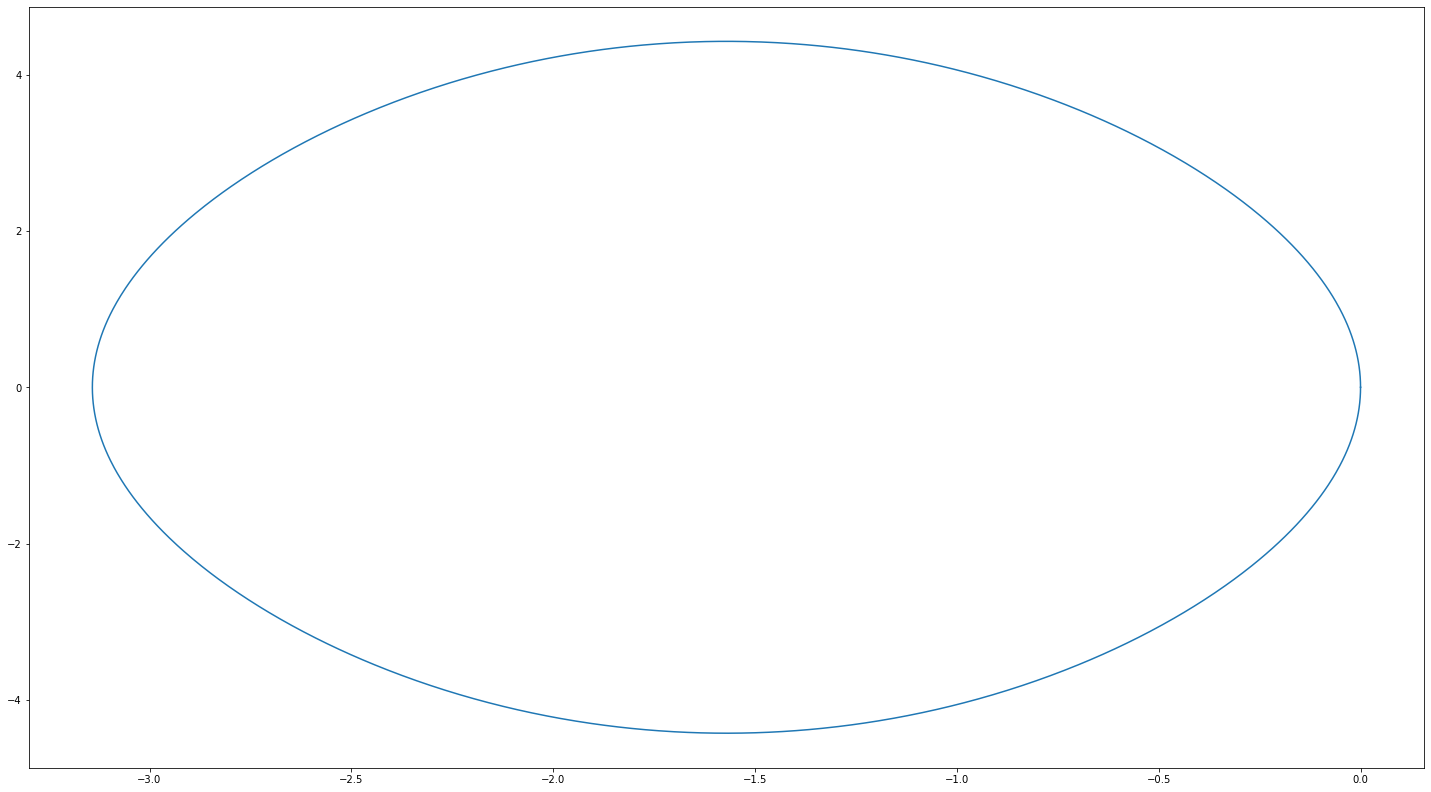

In [1]:
# Import required Python modules
from numpy import *
from matplotlib import pyplot as plt
#from scipy.integrate import quad
from scipy.special import ellipk

# d2y/dx2 = f(x,y,dy)
def f(x,y,dy):
    return [dy, -9.8*cos(y)]

def RK45(f, x0, xf, dxInitial, y0, dy0, epsilon):
    """
    Our 2nd order Runge-Kutta-Fehlberg solver function.

    f:         the RHS of our 1st-order problem.
    x0:        the initial independent variable value for our problem.
    xf:        the final independent variable value for our problem.
    dxInitial: our initial step size.
    y0:        y(x0) - our y initial condition.
    dy0:       dy/dx(x0) - our dy initial condition.
    epsilon:   our error tolerance.

    returns    [x,y,dy] where x is a 1d array of our independent 
    variable values, y is a 1d array of our y solution values and dy is
    a 1d array of our dy/dx solution values.
    """
    i = 0
    x = array([x0])
    y = array([y0])
    dy = array([dy0])
    dx = dxInitial
    while x[i] < xf:
        # dx should be the smallest out of xf-x[i] and the dx determined
        # the last iteration, as otherwise we won't finish at exactly xf
        dx = min([dx, xf-x[i]])
        
        # dy approximators
        K1 = multiply(dx,f(x[i],y[i],dy[i]))
        k1 = K1[0]
        l1 = K1[1]
        K2 = multiply(dx,f(x[i]+dx/4,y[i]+k1/4,dy[i]+l1/4))
        k2 = K2[0]
        l2 = K2[1]
        K3 = multiply(dx,f(x[i]+3*dx/8, y[i]+3*k1/32+9*k2/32, dy[i]+3*l1/32+9*l2/32))
        k3 = K3[0]
        l3 = K3[1]
        K4 = multiply(dx,f(x[i]+12*dx/13, y[i]+1932*k1/2197-7200*k2/2197+7296*k3/2197, dy[i]+1932*l1/2197-7200*l2/2197+7296*l3/2197))
        k4 = K4[0]
        l4 = K4[1]
        K5 = multiply(dx,f(x[i]+dx, y[i]+439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104, dy[i]+439*l1/216 - 8*l2 + 3680*l3/513 - 845*l4/4104))
        k5 = K5[0]
        l5 = K5[1]
        K6 = multiply(dx,f(x[i]+dx/2, y[i]-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40, dy[i]-8*l1/27+2*l2-3544*l3/2565+1859*l4/4104-11*l5/40))
        k6 = K6[0]
        l6 = K6[1]

        # y[i+1] approximations
        y1 = y[i] + 25*k1/216 + 1408*k3/2565+2197*k4/4104-k5/5
        y2 = y[i] + 16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55
        dy1 = dy[i] + 25*l1/216 + 1408*l3/2565+2197*l4/4104-l5/5
        dy2 = dy[i] + 16*l1/135 + 6656*l3/12825 + 28561*l4/56430 - 9*l5/50 + 2*l6/55

        # A representation of the error in our y approximation
        Ry = abs(y1-y2)/dx
        Rdy = abs(dy1-dy2)/dx

        # What our step size should be multiplied by in order to achieve 
        # an error tolerance of epsilon
        sy = 0.84*(epsilon/Ry)**(1/4)
        sdy = 0.84*(epsilon/Rdy)**(1/4)
        
        # If R is less than or equal to epsilon, move onto the next step, 
        # otherwise repeat the iteration with our corrected dx value
        if ( Ry <= epsilon) & (Rdy <= epsilon ):
            x = append(x,[x[i]+dx], axis=0)
            y = append(y,[y1], axis=0)
            dy = append(dy,[dy1], axis=0)
            i += 1
            dx *= min([sy, sdy])
        else:
            dx *= min([sy, sdy])
    
    return [x,y,dy]

# Domain of integration is [x0, xf]
x0 = 0.0
xf = 2*ellipk(1/2)/sqrt(2.45)
# Error tolerance
epsilon = 3e-12
# Initial condition
y0 = 0.0
dy0 = 0.0
[x,y,dy] = RK45(f, x0, xf, (xf-x0)/100, y0, dy0, epsilon)

# Plot our solution
plt.rcParams["figure.figsize"] = (25,14)
plt.figure(1)
plt.plot(x,y)
plt.figure(2)
plt.plot(x,dy)
plt.figure(3)
plt.plot(y,dy)

That calculation took 8.876232476999576 seconds


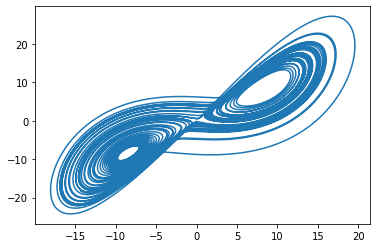

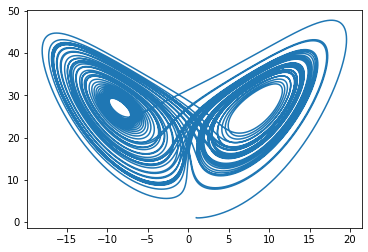

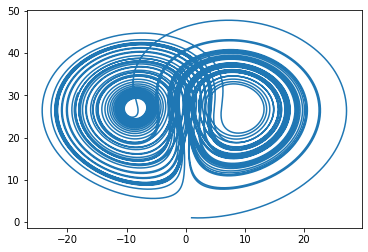

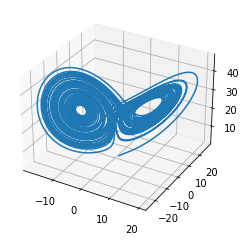

In [7]:
#!/usr/bin/python3
# Import required Python modules
from numpy import array, append, abs, multiply
from matplotlib import pyplot as plt
import matplotlib
import time
%matplotlib inline

# dr/dt = f(t,x,y,z)
# where r = (x,y,z)
def f(t,x,y,z):
    rho = 28
    sigma = 10
    beta = 8.0/3.0
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

def RK45(f, t0, tf, dtInitial, x0, y0, z0, epsilon):
    """
    Our Runge-Kutta-Fehlberg solver function for a group of three coupled
    ODEs.

    f:         the RHS of our problem.
    t0:        the initial independent variable value for our problem.
    tf:        the final independent variable value for our problem.
    dtInitial: our initial step sixe.
    x0:        x(t0) - our x initial condition.
    y0:        y(t0) - our y initial condition.
    z0:        z(t0) - our z initial condition.
    epsilon:   our error tolerance.

    returns    [t,x,y,z] where t is a 1d array of our independent 
    variable values, x is a 1d array of our x solution values, y is
    a 1d array of our y solution values and z is a 1d array of our z solution values.
    """
    i = 0
    t = array([t0])
    x = array([x0])
    y = array([y0])
    z = array([z0])
    dt = dtInitial
    while t[i] < tf:
        # dt should be the smallest out of tf-t[i] and the dt determined
        # the last iteration, as otherwise we won't finish at exactly tf
        dt = min([dt, tf-t[i]])
        
        # r approximators
        K1 = multiply(dt,f(t[i], x[i], y[i], z[i]))
        k1 = K1[0]
        l1 = K1[1]
        m1 = K1[2]

        K2 = multiply(dt,f(t[i]+dt/4, x[i]+k1/4, y[i]+l1/4, z[i]+m1/4))
        k2 = K2[0]
        l2 = K2[1]
        m2 = K2[2]

        K3 = multiply(dt,f(t[i]+3*dt/8, x[i]+3*k1/32+9*k2/32, y[i]+3*l1/32+9*l2/32, z[i]+3*m1/32+9*m2/32))
        k3 = K3[0]
        l3 = K3[1]
        m3 = K3[2]

        K4 = multiply(dt,f(t[i]+12*dt/13, x[i]+1932*k1/2197-7200*k2/2197+7296*k3/2197, y[i]+1932*l1/2197-7200*l2/2197+7296*l3/2197, z[i]+1932*m1/2197-7200*m2/2197+7296*m3/2197))
        k4 = K4[0]
        l4 = K4[1]
        m4 = K4[2]

        K5 = multiply(dt,f(t[i]+dt, x[i]+439*k1/216-8*k2+3680*k3/513-845*k4/4104, y[i]+439*l1/216-8*l2+3680*l3/513-845*l4/4104, z[i]+439*m1/216-8*m2+3680*m3/513-845*m4/4104))
        k5 = K5[0]
        l5 = K5[1]
        m5 = K5[2]

        K6 = multiply(dt,f(t[i]+dt/2, x[i]-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40, y[i]-8*l1/27+2*l2-3544*l3/2565+1859*l4/4104-11*l5/40, z[i]-8*m1/27+2*m2-3544*m3/2565+1859*m4/4104-11*m5/40))
        k6 = K6[0]
        l6 = K6[1]
        m6 = K6[2]

        x1 = x[i] + 25*k1/216+1408*k3/2565+2197*k4/4104-k5/5
        y1 = y[i] + 25*l1/216+1408*l3/2565+2197*l4/4104-l5/5
        z1 = z[i] + 25*m1/216+1408*m3/2565+2197*m4/4104-m5/5
        x2 = x[i] + 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
        y2 = y[i] + 16*l1/135+6656*l3/12825+28561*l4/56430-9*l5/50+2*l6/55
        z2 = z[i] + 16*m1/135+6656*m3/12825+28561*m4/56430-9*m5/50+2*m6/55

        # A representation of the error in our x approximation
        Rx = abs(x1-x2)/dt
        Ry = abs(y1-y2)/dt
        Rz = abs(z1-z2)/dt
        R = max([Rx, Ry, Rz])
        
        # What our step sixe should be multiplied by in order to achieve 
        # an error tolerance of epsilon
        s = (epsilon/(2*R))**(1/4)

        # If R is less than or equal to epsilon, move onto the next step, 
        # otherwise repeat the iteration with our corrected dt value
        if (R <= epsilon):
            t = append(t,[t[i]+dt], axis=0)
            x = append(x,[x1], axis=0)
            y = append(y,[y1], axis=0)
            z = append(z,[z1], axis=0)
            i += 1
        dt *= s

    return t, x, y, z

# Domain of integration is [t0, tf]
t0 = 0.0
tf = 60
# Error tolerance
epsilon = 1e-9
# Initial condition
x0 = 1
y0 = 1
z0 = 1
start_time = time.perf_counter();
t, x, y, z = RK45(f, t0, tf, (tf-t0)/1000, x0, y0, z0, epsilon)
end_time = time.perf_counter();
difference = end_time - start_time;
print("That calculation took", difference, "seconds")

# Plot our solution
plt.figure(1)
plt.plot(x,y)
plt.figure(2)
plt.plot(x,z)
plt.figure(3)
plt.plot(y,z)
fig = plt.figure(4)
ax = fig.gca(projection='3d')
plt.rcParams["figure.figsize"] = (25,14)
ax.plot(x,y,z)

In [33]:
# y''
plot(x,-9.8*cos(y))

-2.7977620220553945e-14

In [56]:
#!/usr/bin/python3
# Import required Python modules
from numpy import array, append, abs, multiply
from matplotlib import pyplot as plt
import matplotlib

def f(params, t, vars, dt):
    sigma, rho, beta = params[0], params[1], params[2]
    x, y, z = vars[0], vars[1], vars[2]
    dx = dt * (sigma*(y-x))
    dy = dt * (x*(rho-z)-y)
    dz = dt * (x*y - beta*z)
    return array([dx, dy, dz])

def RKF45(f, t0, tf, dtInitial, params, conds, epsilon):
    i = 0
    t = array([t0])
    vars = conds
    dt = dtInitial

    while (t[i] < tf):
        dt = min([dt, tf-t[i]])
        K1 = f(params, t[i], vars[i,:], dt)
        K2 = f(params, t[i] + dt/4, vars[i,:] + multiply(1/4, K1), dt)
        K3 = f(params, t[i] + 3*dt/8, vars[i,:] + multiply(3/32, K1) + multiply(9/32, K2), dt)
        K4 = f(params, t[i] + 12*dt/13, vars[i,:] + multiply(1932/2197, K1) + multiply(-7200/2197, K2) + multiply(7296/2197, K3), dt)
        K5 = f(params, t[i] + dt, vars[i,:] + multiply(439/216, K1) + multiply(-8, K2) + multiply(3680/513, K3) + multiply(-845/4104, K4), dt)
        K6 = f(params, t[i] + dt/2, vars[i,:] + multiply(-8/27, K1) + multiply(2, K2) + multiply(-3544/2565, K3) + multiply(1859/4104, K4) + multiply(-11/40, K5), dt)

        vars1 = vars[i,:] + multiply(25/216, K1) + multiply(1408/2565, K3) + multiply(2197/4104, K4) + multiply(-1/5, K5)
        vars2 = vars[i,:] + multiply(16/135, K1) + multiply(6656/12825, K3) + multiply(28561/56430, K4) + multiply(-9/50, K5) + multiply(2/55, K6)
        
        Rarr = abs((vars2-vars1)/dt)
        R = max(Rarr)
        s = (epsilon/(2*R))**(1/4)

        if (R <= epsilon):
            t = append(t, [t[i]+dt], axis=0)
            vars = append(vars, [vars1], axis=0)
            i += 1
        
        dt *= s

    return t, vars

# Domain of integration
t0 = 0.0
tf = 60
epsilon = 1e-9
x0 = 1
y0 = 1
z0 = 1
dtInitial = 0.1               
conds = array([[x0, y0, z0]])
params = array([10, 28, 8/3])
t, vars = RKF45(f, t0, tf, dtInitial, params, conds, epsilon)


In [55]:
vars

array([[1.        , 1.        , 1.        ],
       [1.00000036, 1.00021974, 0.99119794],
       [1.00000174, 1.00048612, 0.98078034],
       ...,
       [6.83130051, 6.83130051, 1.66666667],
       [6.83130051, 6.83130051, 1.66666667],
       [6.83130051, 6.83130051, 1.66666667]])

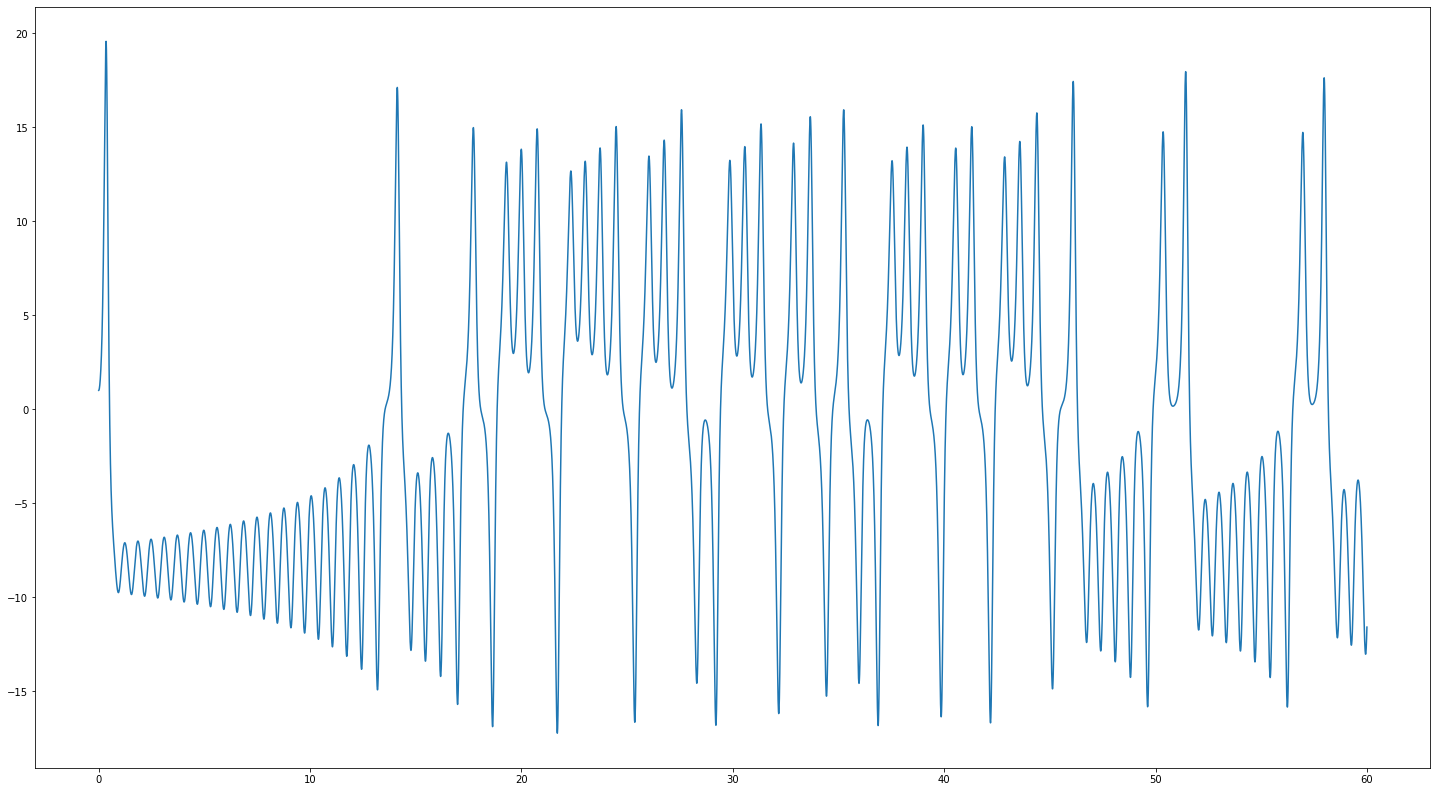

In [57]:
plt.plot(t, vars[:,0])

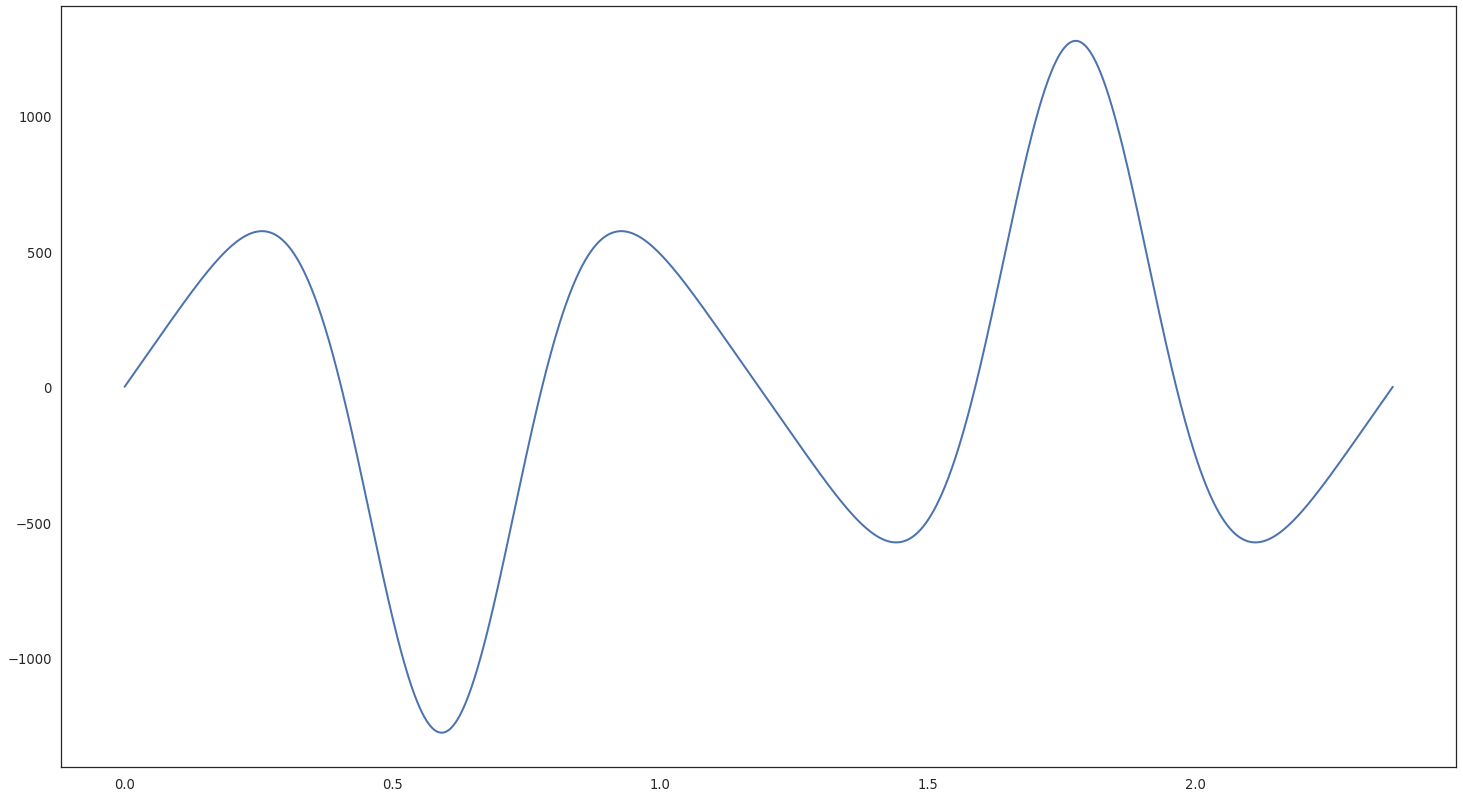

In [34]:
# y^(5)(x)
plot(x,19.6*cos(y)*dy*(-9.8*cos(y))-9.8*sin(y)*dy**3+(9.8**2)*(sin(y)**2-cos(y)**2)*dy)

<ipython-input-7-698dc8c330fc>:93: RuntimeWarning: divide by zero encountered in double_scalars
  sy = 0.84*(epsilon/Ry)**(1/4)
<ipython-input-7-698dc8c330fc>:92: RuntimeWarning: divide by zero encountered in double_scalars
  sx = 0.84*(epsilon/Rx)**(1/4)
<ipython-input-7-698dc8c330fc>:94: RuntimeWarning: divide by zero encountered in double_scalars
  sz = 0.84*(epsilon/Rz)**(1/4)


--- 25.115046739578247 seconds ---


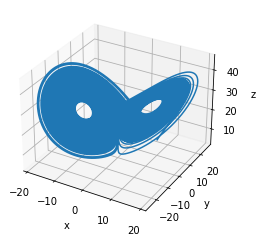

In [7]:
# Import required Python modules
import time
start_time = time.time();
from numpy import array, append, abs, multiply
from matplotlib import pyplot as plt
import matplotlib

%matplotlib inline

# dr/dt = f(t,x,y,z)
# where r = (x,y,z)
def f(t,x,y,z):
    rho = 28
    sigma = 10
    beta = 8.0/3.0
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

def RK45(f, t0, tf, dtInitial, x0, y0, z0, epsilon):
    """
    Our Runge-Kutta-Fehlberg solver function for a group of three coupled
    ODEs.

    f:         the RHS of our problem.
    t0:        the initial independent variable value for our problem.
    tf:        the final independent variable value for our problem.
    dtInitial: our initial step sixe.
    x0:        x(t0) - our x initial condition.
    y0:        y(t0) - our y initial condition.
    z0:        z(t0) - our z initial condition.
    epsilon:   our error tolerance.

    returns    [t,x,y,z] where t is a 1d array of our independent 
    variable values, x is a 1d array of our x solution values, y is
    a 1d array of our y solution values and z is a 1d array of our z solution values.
    """
    i = 0
    t = array([t0])
    x = array([x0])
    y = array([y0])
    z = array([z0])
    dt = dtInitial
    while t[i] < tf:
        # dt should be the smallest out of tf-t[i] and the dt determined
        # the last iteration, as otherwise we won't finish at exactly tf
        dt = min([dt, tf-t[i]])
        
        # r approximators
        K1 = multiply(dt,f(t[i], x[i], y[i], z[i]))
        k1 = K1[0]
        l1 = K1[1]
        m1 = K1[2]

        K2 = multiply(dt,f(t[i]+dt/4, x[i]+k1/4, y[i]+l1/4, z[i]+m1/4))
        k2 = K2[0]
        l2 = K2[1]
        m2 = K2[2]

        K3 = multiply(dt,f(t[i]+3*dt/8, x[i]+3*k1/32+9*k2/32, y[i]+3*l1/32+9*l2/32, z[i]+3*m1/32+9*m2/32))
        k3 = K3[0]
        l3 = K3[1]
        m3 = K3[2]

        K4 = multiply(dt,f(t[i]+12*dt/13, x[i]+1932*k1/2197-7200*k2/2197+7296*k3/2197, y[i]+1932*l1/2197-7200*l2/2197+7296*l3/2197, z[i]+1932*m1/2197-7200*m2/2197+7296*m3/2197))
        k4 = K4[0]
        l4 = K4[1]
        m4 = K4[2]

        K5 = multiply(dt,f(t[i]+dt, x[i]+439*k1/216-8*k2+3680*k3/513-845*k4/4104, y[i]+439*l1/216-8*l2+3680*l3/513-845*l4/4104, z[i]+439*m1/216-8*m2+3680*m3/513-845*m4/4104))
        k5 = K5[0]
        l5 = K5[1]
        m5 = K5[2]

        K6 = multiply(dt,f(t[i]+dt/2, x[i]-8*k1/27+2*k2-3544*k3/2565+1859*k4/4104-11*k5/40, y[i]-8*l1/27+2*l2-3544*l3/2565+1859*l4/4104-11*l5/40, z[i]-8*m1/27+2*m2-3544*m3/2565+1859*m4/4104-11*m5/40))
        k6 = K6[0]
        l6 = K6[1]
        m6 = K6[2]

        x1 = x[i] + 25*k1/216+1408*k3/2565+2197*k4/4104-k5/5
        y1 = y[i] + 25*l1/216+1408*l3/2565+2197*l4/4104-l5/5
        z1 = z[i] + 25*m1/216+1408*m3/2565+2197*m4/4104-m5/5
        x2 = x[i] + 16*k1/135+6656*k3/12825+28561*k4/56430-9*k5/50+2*k6/55
        y2 = y[i] + 16*l1/135+6656*l3/12825+28561*l4/56430-9*l5/50+2*l6/55
        z2 = z[i] + 16*m1/135+6656*m3/12825+28561*m4/56430-9*m5/50+2*m6/55

        # A representation of the error in our x approximation
        Rx = abs(x1-x2)/dt
        Ry = abs(y1-y2)/dt
        Rz = abs(z1-z2)/dt
        
        # What our step sixe should be multiplied by in order to achieve 
        # an error tolerance of epsilon
        sx = 0.84*(epsilon/Rx)**(1/4)
        sy = 0.84*(epsilon/Ry)**(1/4)
        sz = 0.84*(epsilon/Rz)**(1/4)

        # If R is less than or equal to epsilon, move onto the next step, 
        # otherwise repeat the iteration with our corrected dt value
        if ( Rx <= epsilon) & (Ry <= epsilon) & (Rz <= epsilon):
            t = append(t,[t[i]+dt], axis=0)
            x = append(x,[x1], axis=0)
            y = append(y,[y1], axis=0)
            z = append(z,[z1], axis=0)
            i += 1
            dt *= min([sx, sy, sz])
        else:
            dt *= min([sx, sy, sz])

    
    return [t,x,y,z]

# Domain of integration is [t0, tf]
t0 = 0.0
tf = 200
# Error tolerance
epsilon = 1e-8
# Initial condition
x0 = 10
y0 = 10
z0 = 10
[t,x,y,z] = RK45(f, t0, tf, (tf-t0)/1000, x0, y0, z0, epsilon)

# Plot our solution
#plt.figure(1)
#plt.plot(x,y)
#plt.figure(2)
#plt.plot(x,z)
#plt.figure(3)
#plt.plot(y,z)
fig = plt.figure(4)
ax = fig.gca(projection='3d')
plt.rcParams["figure.figsize"] = (25,14)
ax.plot(x,y,z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
print("--- %s seconds ---" % (time.time() - start_time))


In [5]:
?RK45

Signature: RK45(f, t0, tf, dtInitial, x0, y0, z0, epsilon)
Docstring:
Our Runge-Kutta-Fehlberg solver function for a group of three coupled
ODEs.

f:         the RHS of our problem.
t0:        the initial independent variable value for our problem.
tf:        the final independent variable value for our problem.
dtInitial: our initial step sixe.
x0:        x(t0) - our x initial condition.
y0:        y(t0) - our y initial condition.
z0:        z(t0) - our z initial condition.
epsilon:   our error tolerance.

returns    [t,x,y,z] where t is a 1d array of our independent 
variable values, x is a 1d array of our x solution values, y is
a 1d array of our y solution values and z is a 1d array of our z solution values.
File:      /data/fusion809/GitHub/mine/maths/python-scripts/IVP/<ipython-input-4-6f9ca29f28b7>
Type:      function
